# A lightweight model for DNPU devices 
**By Hans-Christian Ruiz Euler**  

Current models of DNPU devices are feedforward networks with 5 hidden layers and 90 nodes per layer, having 33571 learnable parameters. This is a relatively big model for a single node when considering DNPU networks. We will call this the base model.  
This notebook introduces and explores a lightweight model for DNPU devices developed to reduce the computational burden of a single DNPU node when researching DNPU networks.  
This model is called a linear-pyramidal model due to its architecture composed of two parts, a linear term of the input and a "pyramidal" network. This pyramidal network is a feedforward neural network with four hidden layers having 70, 50, 30, and 15 neurons each. The activation of the hidden neurons is given by a ReLU function. The output layer linearly maps the last 15 hidden neurons to the output representing the current of the device given the applied voltages. This architecture has 6,129 learnable parameters, i.e. 82% less parameters than the base model. 
In the following, we will train and compare the linear-pyramidal model to the base model described above.

In [1]:
import os
import time
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

from smg.utils.io import load_configs
from smg.model.constructor import LinPyr
from smg.model.pytorch import TorchHandler
from smg.generator import SMG
from smg.dnpu.dataset import dnpuData

In [6]:
lp_configs = load_configs("./configs_explore_model.json")
lp_model = LinPyr(lp_configs["model"],verbose=False)
nr_params = sum([p.numel() for p in model.parameters() if p.requires_grad])
print(f"Number of learnable parameters in this model {nr_params}")

Number of learnable parameters in this model 6129


Data loading from: 
../tmp/example_data/example_1/processed_data.npz
Metadata :
 dict_keys(['save_directory', 'data_name', 'processor', 'input_data', 'clipping_value'])
--> Shape of INPUTS: (2912777, 7)
--> Shape of OUTPUTS: (2912777,)
Splitting data in [2330222, 582555]
------- TRAINING ---------


Train. loss:0.00129 | Val. loss:0.0012: 100%|█| 100/100 [55:50<00:00, 33.51s/it]


------------DONE-------------


<IPython.core.display.Javascript object>


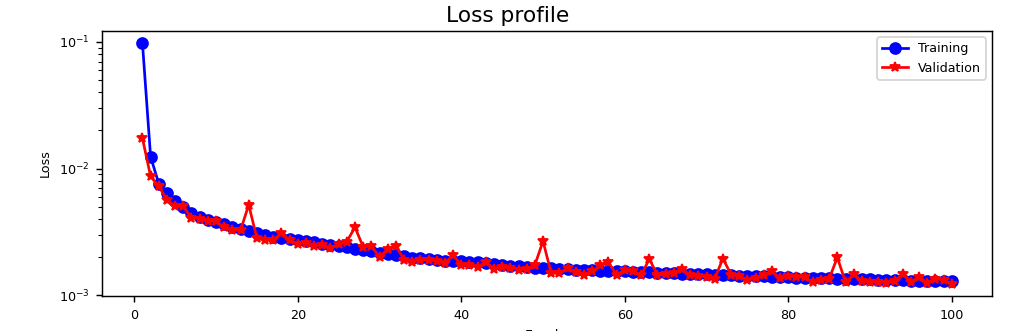

<IPython.core.display.Javascript object>


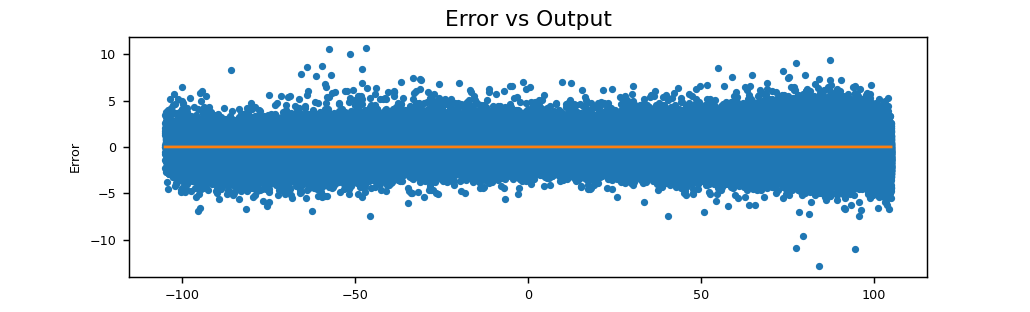

<IPython.core.display.Javascript object>


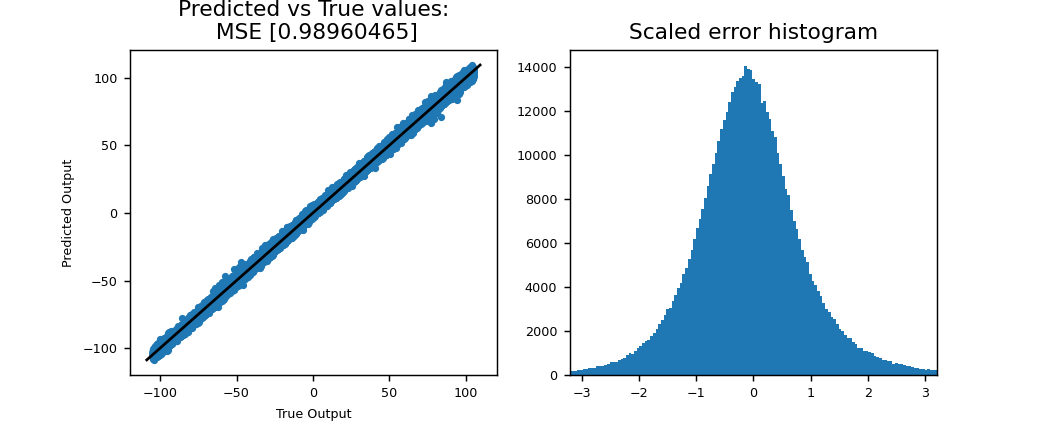

In [7]:
lp_smg = SMG(lp_configs)
dataset = dnpuData(lp_smg.configs["data"])
lp_smg.set_trainer(lp_model)
lp_smg.set_dataloader(dataset)
lp_smg.generate(show=True)

The linear-pyramidal model can be trained in one hour to obtain an error of about 0.99 nA. Training is performed with **"batch_size": 256, "nr_epochs": 100, and a "learning_rate": 0.0004**. 

## Comparison to base model
In comparison to the best performing base models with en error of around 0.77 nA, this is a very good performance given a model that is 82% smaller (The base model has 33,571 learnable parameters). With more exploration of hyperparameters, I am confident that this can be improved further, see report "Exploring training". 